In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,make_scorer
from sklearn.neural_network import MLPRegressor

D:\software\Anaconda3\envs\dataAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\software\Anaconda3\envs\dataAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

In [99]:
import matplotlib as mpl
mpl.rcParams.update(
    {
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    }
)

In [3]:
np_CHI = np.load('./np_regression/np_CHI.npy')
np_IG = np.load('./np_regression/np_IG.npy')
np_MI = np.load('./np_regression/np_MI.npy')

In [11]:
# 标准化训练集的数据
def standard_data(train_data):
    print('data_size:{}'.format(train_data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(train_data[:,0:2])
    np2 = train_data[:,2:17]
    np3 = scaler.fit_transform(train_data[:,17:67])
#     np4 = data[:,67:68]
    np_scale_data = np.hstack((np1,np2,np3))
    print('data_scale_size:{}'.format(np_scale_data.shape))
    return np_scale_data


# 把数据切分成训练集和测试集 输入没有标准化的数据
def split_data(data):
    X = data[:,0:-1]
    y = data[:,-1]
    return train_test_split(X,y,test_size=0.2)
# 
def train_Ridge(train_x,train_y):
    train_scale_x = standard_data(train_x)
    param_range = np.logspace(-1,3,15)
    train_scores,valid_scores = validation_curve(Ridge(max_iter=4000),
                                                 train_scale_x,train_y,
                                                 param_name='alpha',
                                                 param_range=param_range,
                                                 scoring=make_scorer(mean_squared_error,greater_is_better=True),
                                                 cv=5)
    train_score_ans = [item.mean() for item in train_scores]
    valid_score_ans = [item.mean() for item in valid_scores]
    return param_range,train_score_ans,valid_score_ans

def train_Lasso(train_x,train_y):
    train_scale_x = standard_data(train_x)
    param_range = np.logspace(-4,-1,15)
    train_scores,valid_scores = validation_curve(Lasso(max_iter=16000),
                                                 train_scale_x,train_y,
                                                 param_name='alpha',
                                                 param_range=param_range,
                                                 scoring=make_scorer(mean_squared_error,greater_is_better=True),
                                                 cv=5)
    train_score_ans = [item.mean() for item in train_scores]
    valid_score_ans = [item.mean() for item in valid_scores]
    return param_range,train_score_ans,valid_score_ans

In [208]:
def train_MLP(train_valid_x,train_valid_y,size):
    train_valid_scale_x = standard_data(train_valid_x)
    train_x,valid_x,train_y,valid_y = train_test_split(train_valid_scale_x,train_valid_y,test_size=0.1)
    param_range = np.logspace(-5,1,15)
    train_score_ans = []
    valid_score_ans = []
    cnt = 1
    for alpha in param_range:
        print('{}--alpha:{}'.format(cnt,alpha))
        MLP = MLPRegressor(hidden_layer_sizes=size,
                           activation='relu',
                           solver='adam',
                           alpha=alpha,
                           batch_size=128,
                           random_state=None,
                           early_stopping=True,
                           validation_fraction=0.1,
                           max_iter=5000)
        model = MLP.fit(train_x,train_y)
        train_score_ans.append(mean_squared_error(train_y,model.predict(train_x)))
        valid_score_ans.append(mean_squared_error(valid_y,model.predict(valid_x)))
        cnt += 1
    return param_range,train_score_ans,valid_score_ans

In [5]:
train_x,test_x,train_y,test_y = split_data(np_CHI)

data_size:(2903, 67)
data_scale_size:(2903, 67)


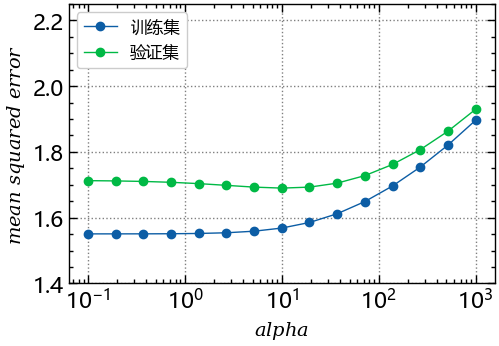

In [13]:
param_range,train_score,valid_score = train_Ridge(train_x,train_y)
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(5.5,3.7),dpi=100)
    plt.xscale('log')
    plt.ylim([1.4,2.25])
    plt.plot(param_range,train_score,linewidth=1,marker='o',label='训练集')
    plt.plot(param_range,valid_score,linewidth=1,marker='o',label='验证集')
    plt.xlabel(r'$alpha$',fontdict={'size':14})
    plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()

data_size:(2596, 67)
data_scale_size:(2596, 67)


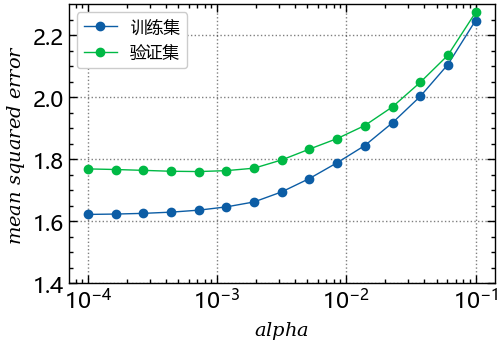

In [128]:
param_range_lasso,train_score_lasso,valid_score_lasso = train_Lasso(train_x,train_y)
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(5.5,3.7),dpi=100)
    plt.xscale('log')
    plt.ylim([1.4,2.3])
    plt.plot(param_range_lasso,train_score_lasso,linewidth=1,marker='o',label='训练集')
    plt.plot(param_range_lasso,valid_score_lasso,linewidth=1,marker='o',label='验证集')
    plt.xlabel(r'$alpha$',fontdict={'size':14})
    plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()

In [205]:
train_x,test_x,train_y,test_y = split_data(np_MI)

data_size:(2596, 67)
data_scale_size:(2596, 67)
1--alpha:1e-05
2--alpha:2.6826957952797274e-05
3--alpha:7.196856730011514e-05
4--alpha:0.00019306977288832496
5--alpha:0.0005179474679231213
6--alpha:0.0013894954943731374
7--alpha:0.003727593720314938
8--alpha:0.01
9--alpha:0.026826957952797246
10--alpha:0.07196856730011514
11--alpha:0.19306977288832497
12--alpha:0.5179474679231213
13--alpha:1.389495494373136
14--alpha:3.727593720314938
15--alpha:10.0


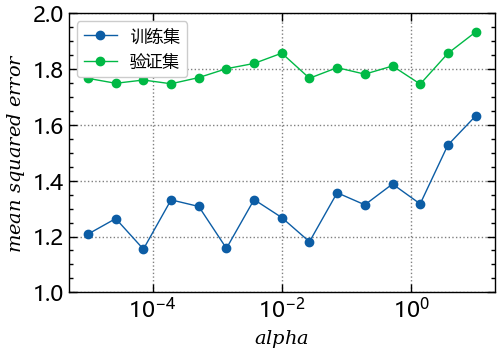

In [210]:

param_range_nn,train_score_nn,valid_score_nn = train_MLP(train_x,train_y,size=(50,))
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(5.5,3.7),dpi=100)
    plt.xscale('log')
    plt.ylim([1.0,2.0])
    plt.plot(param_range_nn,train_score_nn,linewidth=1,marker='o',label='训练集')
    plt.plot(param_range_nn,valid_score_nn,linewidth=1,marker='o',label='验证集')
    plt.xlabel(r'$alpha$',fontdict={'size':14})
    plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()